In [5]:
import tensorflow as tf
import numpy as np
import cv2
import os
import numpy as np
import pandas as pd
import imageio
import random
import matplotlib.pyplot as plt
import keras
import tensorflow.keras as K
import tensorflow.keras.backend as Kback

from keras import layers
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Conv2DTranspose
from keras.layers import concatenate
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
from keras.applications.resnet import ResNet50
from keras.applications import vgg16
from keras.applications import inception_v3
from keras.src.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications import DenseNet121, NASNetMobile, EfficientNetB0, Xception
from keras.layers import GlobalAveragePooling2D
from keras.applications.densenet import DenseNet121

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.class_weight import compute_class_weight


from collections import Counter
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')
# with open('/content/drive/My Drive/foo.txt', 'w') as f:
#   f.write('Hello Google Drive!')
# !cat /content/drive/My\ Drive/foo.txt

In [7]:
# dataset="/content/drive/My Drive/LUNGCANCER/IQ-OTH/The IQ-OTHNCCD lung cancer dataset"

In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the base path to your dataset
base_path = "/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset"
# /kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases
# List of class names (A, B, C)
class_names =  ["Normal cases", "Malignant cases", "Bengin cases"]

# Initialize empty lists for images and labels
all_images = []
all_labels = []

# Load images and assign labels
for label, class_name in enumerate(class_names):
    class_path = os.path.join(base_path, class_name)
    image_files = os.listdir(class_path)

    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read as GBR
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


        # img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        img = cv2.resize(img, (224, 224))  # Resize to desired dimensions
        img = img / 255.0  # Normalize pixel values (assuming 8-bit images)
        all_images.append(img)
        all_labels.append(label)


In [9]:
data=all_images
labels=all_labels

In [10]:
# data, labels = shuffle(data, labels, random_state=42)


print('Data length:', len(data))
print('labels counts:', Counter(labels))

X = np.array(data).reshape(-1, 224, 224, 3)
y = np.array(labels)

Data length: 1097
labels counts: Counter({1: 561, 0: 416, 2: 120})


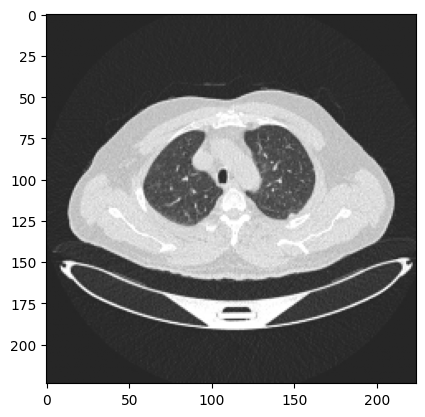

In [11]:
plt.imshow(X[y==2][2])

In [12]:
X_train, X_mix, y_train, y_mix = train_test_split(X, y, test_size=0.2)
# X_test, X_valid, y_test, y_valid = train_test_split(X_mix, y_mix, test_size=0.2, random_state=10)
X_test=X_mix
y_test=y_mix
X_valid=X_test
y_valid=y_test

print('Train length:', len(X_train), X_train.shape)
print('Valid length:', len(X_valid), X_valid.shape)
print("Test", len(X_test), X_test.shape)
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
# X,y valid are used for evaluate matrix






# X_train, X_valid, y_train, y_valid=X_train, X_test, y_train, y_test


# print('Train length:', len(X_train), X_train.shape)
# print('Valid length:', len(X_valid), X_valid.shape)

# train_generator = train_datagen.flow(X_fold, y_fold, batch_size=8, shuffle=True)
# validation_generator = val_datagen.flow(X_valid, y_valid, batch_size=8, shuffle=True)

Train length: 877 (877, 224, 224, 3)
Valid length: 220 (220, 224, 224, 3)
Test 220 (220, 224, 224, 3)


In [ ]:
X_train, X_mix, y_train, y_mix = train_test_split(X, y, test_size=0.2, random_state=10)
X_test, X_valid, y_test, y_valid = train_test_split(X_mix, y_mix, test_size=0.2, random_state=10)



print('Train length:', len(X_train), X_train.shape)
print('Valid length:', len(X_valid), X_valid.shape)
print("Test length", len(X_test), X_test.shape)
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
# X,y valid are used for evaluate matrix






# X_train, X_valid, y_train, y_valid=X_train, X_test, y_train, y_test


# print('Train length:', len(X_train), X_train.shape)
# print('Valid length:', len(X_valid), X_valid.shape)

# train_generator = train_datagen.flow(X_fold, y_fold, batch_size=8, shuffle=True)
# validation_generator = val_datagen.flow(X_valid, y_valid, batch_size=8, shuffle=True)

# **DenseNet121 on 100**


# +Attention

In [ ]:


import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121

# Load the pre-trained DenseNet121 model (without top layers)
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))



# We define the number of classes in the classification problem.
NUM_CLASSES = 3

# First, a sequential model is created, which will be used to build the VGG model.
vgg_model = Sequential()

# Se agrega una capa al modelo. base_model el modelo anteriormente preentrenado.
vgg_model.add(base_model)

# A flattening layer (Flatten) is added. This layer converts the output from the
# previous layer (which is likely a three-dimensional tensor) into a one-dimensional vector.
vgg_model.add(layers.Flatten())
dummy_input = tf.zeros((1, 224, 224, 3))
_ = vgg_model(dummy_input)

intermediate_features = vgg_model.layers[-1].output
attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
attention_output = layers.Multiply()([intermediate_features, attention_weights])


# vgg_model.add(layers.Dropout(0.25))
# vgg_model.add(layers.Dense(256, activation='relu'))
# vgg_model.add(layers.Dense(128, activation='relu'))
# vgg_model.add(layers.Dense(64, activation='relu'))



vgg_model.add(layers.Dense(256, activation='relu'))
# vgg_model.add(layers.Dense(512, activation='relu'))

vgg_model.add(layers.Dense(32, activation='relu'))


vgg_model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# The first layer of the model (base_model) is frozen, so the weights of this layer
# will not be updated during training.
vgg_model.layers[0].trainable = False



vgg_model.summary()






# vgg_model.summary()

optimizer=keras.optimizers.Adam(learning_rate=0.0001)
losses=keras.losses.SparseCategoricalCrossentropy()
metrics=['accuracy']
vgg_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)

epochs=20
batch_size=32
history= vgg_model.fit(X_train,y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))



29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (1, 7, 7, 1024)        │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (1, 50176)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1, 256)               │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 32)                │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (1, 3)                 │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,891,139 (75.88 MB)

 Trainable params: 12,853,635 (49.03 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/100


In [11]:
test_loss, test_accuracy = vgg_model.evaluate(X_test,y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
y_pred = vgg_model.predict(X_test, verbose=1)
y_pred_2 = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_2))



7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9965 - loss: 0.0270
Test Loss: 0.03285326808691025
Test Accuracy: 0.9954545497894287
3/7 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

W0000 00:00:1720679436.136264     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        92
           1       1.00      1.00      1.00       110
           2       1.00      0.94      0.97        18

    accuracy                           1.00       220
   macro avg       1.00      0.98      0.99       220
weighted avg       1.00      1.00      1.00       220



<function matplotlib.pyplot.show(close=None, block=None)>

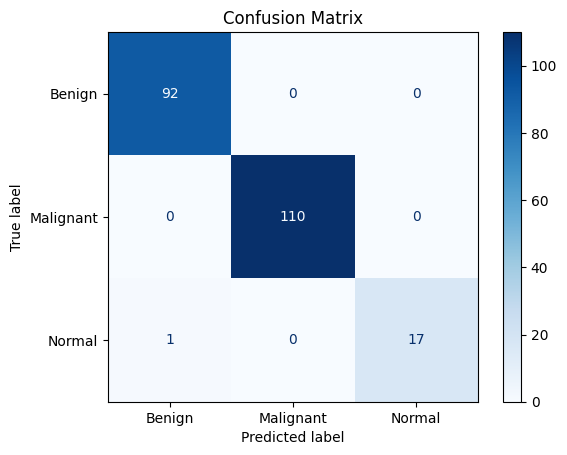

In [12]:
cm= confusion_matrix(y_true=y_test, y_pred=y_pred_2)
target_names = ["Benign", "Malignant", "Normal"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

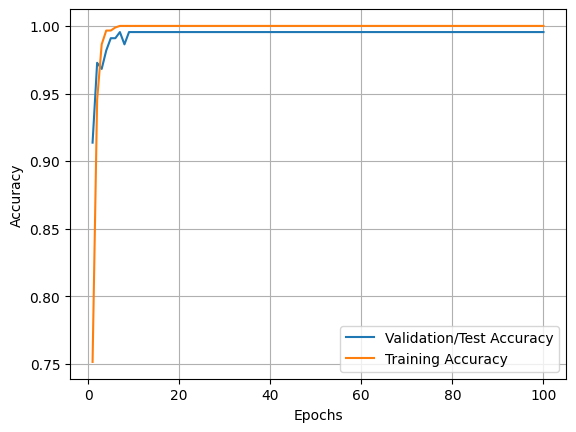

In [13]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')
plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

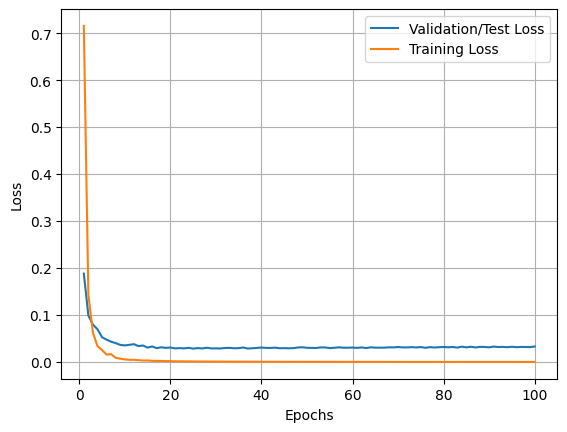

In [14]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [15]:


#One vs One
roc_auc_score(y_test, y_pred,multi_class='ovo')


0.9972149026496853

In [16]:
#One vs Rest
roc_auc_score(y_test, y_pred,multi_class='ovr')

0.9984469914382744

# **MobileNEtV2 on 100**


# **+Attention**

In [ ]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)





import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121

# Load the pre-trained DenseNet121 model (without top layers)
# base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))



# We define the number of classes in the classification problem.
NUM_CLASSES = 3

# First, a sequential model is created, which will be used to build the VGG model.
vgg_model = Sequential()

# Se agrega una capa al modelo. base_model el modelo anteriormente preentrenado.
vgg_model.add(base_model)

# A flattening layer (Flatten) is added. This layer converts the output from the
# previous layer (which is likely a three-dimensional tensor) into a one-dimensional vector.
vgg_model.add(layers.Flatten())
dummy_input = tf.zeros((1, 224, 224, 3))
_ = vgg_model(dummy_input)

intermediate_features = vgg_model.layers[-1].output
attention_weights = layers.Dense(1, activation='softmax')(intermediate_features)
attention_weights = layers.Reshape((1, 1, -1))(attention_weights)
attention_output = layers.Multiply()([intermediate_features, attention_weights])


# vgg_model.add(layers.Dropout(0.25))
# vgg_model.add(layers.Dense(256, activation='relu'))
# vgg_model.add(layers.Dense(128, activation='relu'))
# vgg_model.add(layers.Dense(64, activation='relu'))



vgg_model.add(layers.Dense(256, activation='relu'))
# vgg_model.add(layers.Dense(512, activation='relu'))

vgg_model.add(layers.Dense(32, activation='relu'))


vgg_model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# The first layer of the model (base_model) is frozen, so the weights of this layer
# will not be updated during training.
vgg_model.layers[0].trainable = False



vgg_model.summary()






# vgg_model.summary()

optimizer=keras.optimizers.Adam(learning_rate=0.00032)
losses=keras.losses.SparseCategoricalCrossentropy()
metrics=['accuracy']
vgg_model.compile(optimizer=optimizer,loss=losses,metrics=metrics)

epochs=20
batch_size=32
history= vgg_model.fit(X_train,y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))



In [20]:

test_loss, test_accuracy = vgg_model.evaluate(X_test,y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
y_pred = vgg_model.predict(X_test, verbose=1)
y_pred_2 = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_2))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9848 - loss: 0.0565
Test Loss: 0.06389608979225159
Test Accuracy: 0.9863636493682861
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 538ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        92
           1       1.00      1.00      1.00       110
           2       0.94      0.89      0.91        18

    accuracy                           0.99       220
   macro avg       0.97      0.96      0.97       220
weighted avg       0.99      0.99      0.99       220



<function matplotlib.pyplot.show(close=None, block=None)>

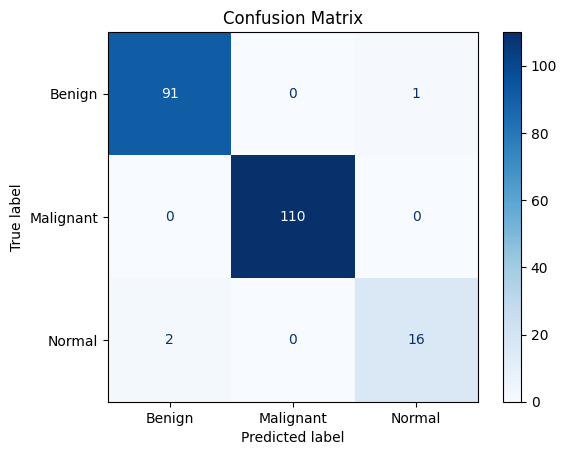

In [21]:
cm= confusion_matrix(y_true=y_test, y_pred=y_pred_2)
target_names = ["Benign", "Malignant", "Normal"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

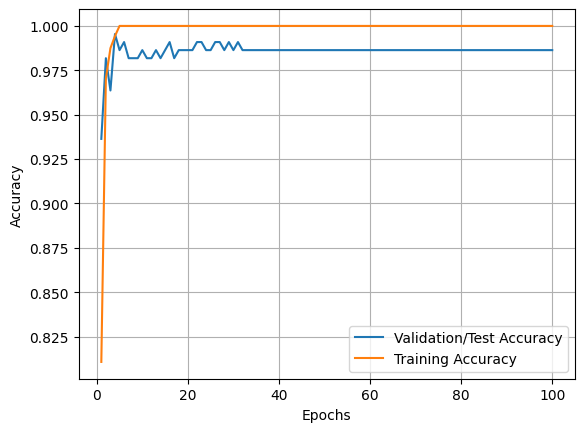

In [22]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')
plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`

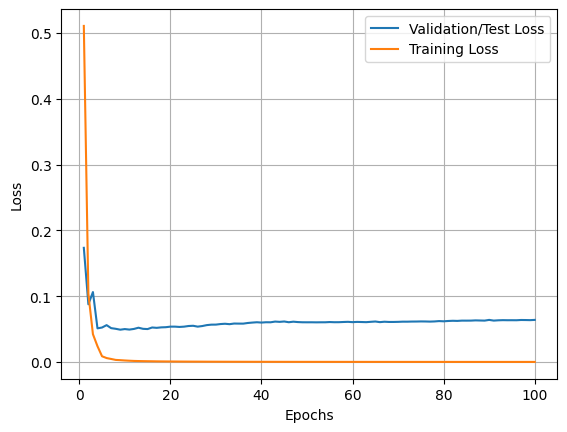

In [23]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1)
plt.setp(line2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
#One vs One
roc_auc_score(y_test, y_pred,multi_class='ovo')

0.9909219001610307

In [25]:
#One vs Rest
roc_auc_score(y_test, y_pred,multi_class='ovr')

0.9941639799170133